<font color="#CA3532"><h1 align="left">Deep Learning</h1></font>
<font color="#6E6E6E"><h2 align="left">Introducción a Keras: Autoencoders</h2></font> 

En este notebook vamos a diseñar un autoencoder para intentar codificar el dataset de MNIST.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil

2023-12-01 17:08:09.962391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 17:08:10.809725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### <font color="#CA3532">Descarga del dataset MNIST</font>

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


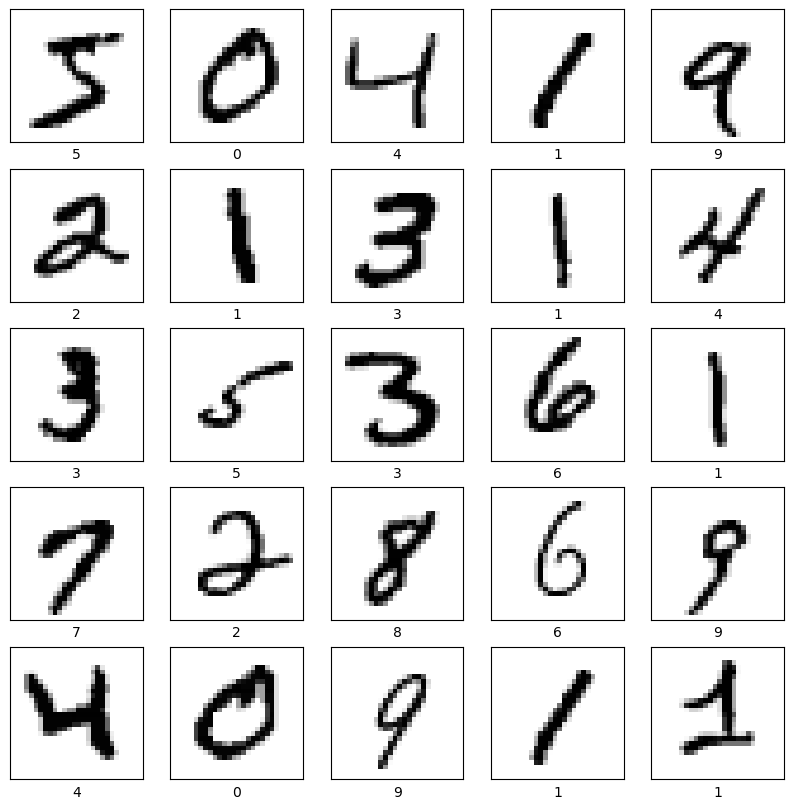

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

**Preprocesamiento de datos**

In [4]:
train_images = train_images / 255
test_images = test_images / 255

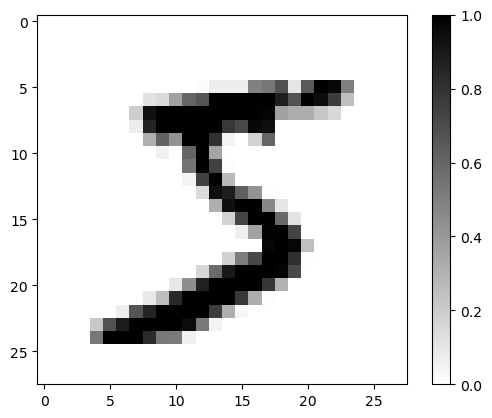

In [5]:
plt.imshow(train_images[0], plt.cm.binary, vmin=0, vmax=1)
plt.colorbar()
plt.show()

### <font color="#CA3532">Diseño del modelo</font>

In [6]:
input_layer = tf.keras.layers.Input(shape=(28,28))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
encoded_layer = tf.keras.layers.Dense(256, activation="relu")(flatten_layer)
decoded_layer = tf.keras.layers.Dense(784, activation="linear")(encoded_layer)

2023-12-01 17:08:13.195311: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 17:08:13.227151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 17:08:13.227382: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### <font color="#CA3532">Entrenamiento del modelo</font>

In [7]:
batch_size = 100
learning_rate = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [8]:
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoded_layer)
autoencoder.compile(optimizer=optimizer, loss="mean_squared_error")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 784)               201488    
                                                                 
Total params: 402448 (1.54 MB)
Trainable params: 402448 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
h = autoencoder.fit(train_images, train_images.reshape(-1, 28*28), 
                    batch_size=batch_size,
                    validation_data=(test_images, test_images.reshape(-1, 28*28)),
                    epochs=30)

Epoch 1/30


2023-12-01 17:08:14.625656: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x778a620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-01 17:08:14.625682: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 970, Compute Capability 5.2
2023-12-01 17:08:14.629729: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-01 17:08:14.643944: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-12-01 17:08:14.762810: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 [==============================] - 2s 2ms/step - loss: 0.0177 - val_loss: 0.0071
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 11/3

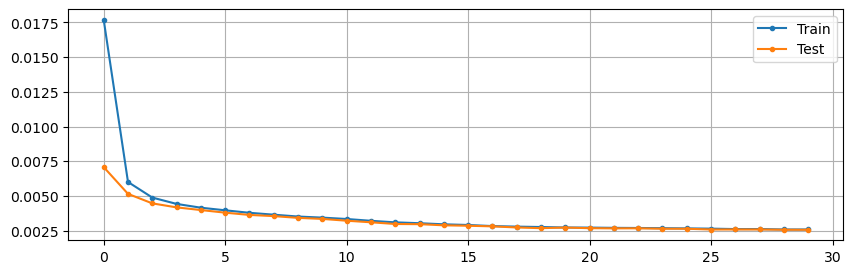

In [10]:
plt.figure(figsize=(10, 3))
plt.plot(h.history["loss"], '.-', label="Train")
plt.plot(h.history["val_loss"], '.-', label="Test")
plt.legend()
plt.grid()
plt.show()

In [11]:
decoded_imgs = autoencoder.predict(train_images)

1875/1875 [==============================] - 2s 827us/step


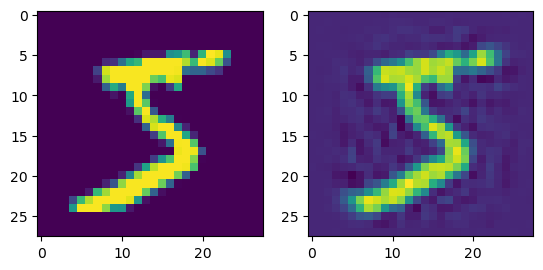

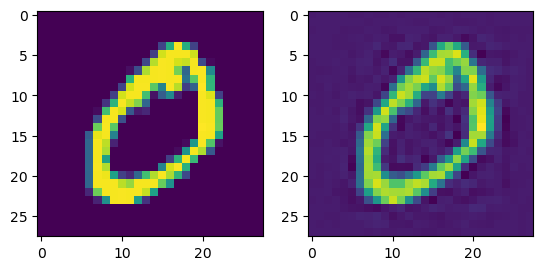

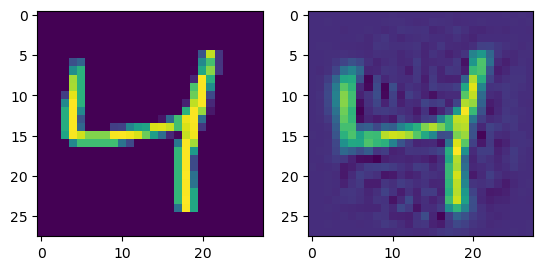

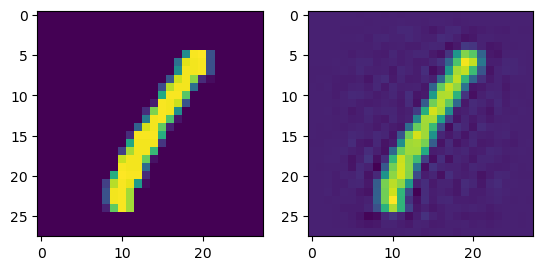

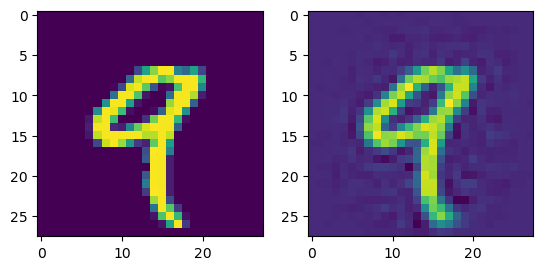

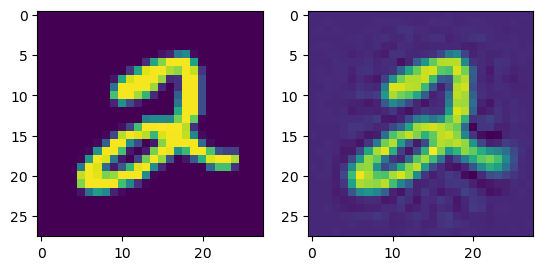

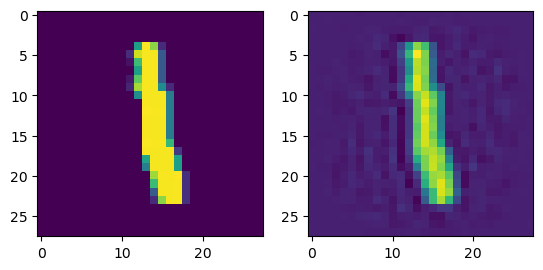

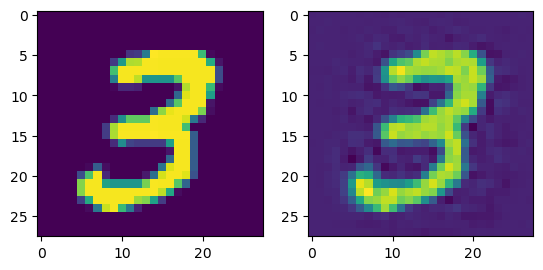

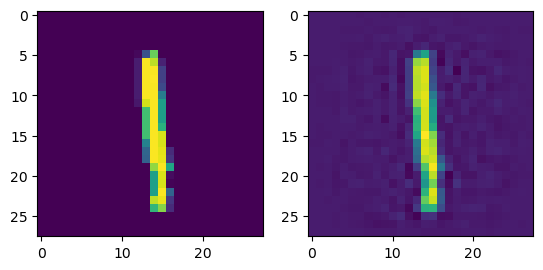

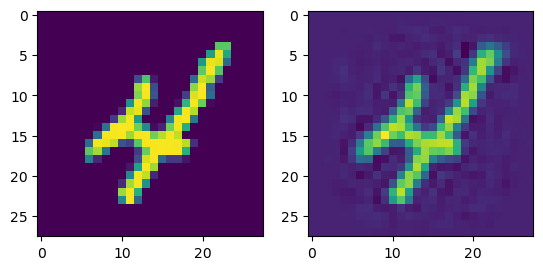

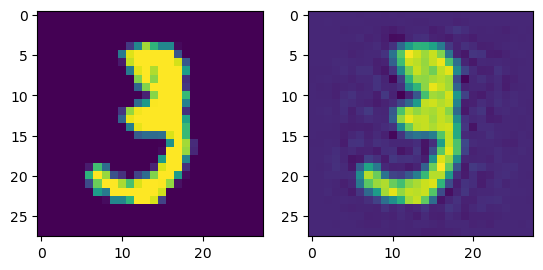

In [12]:
for i, (original, decoded) in enumerate(zip(train_images, decoded_imgs)):
    plt.subplot(1,2,1)
    plt.imshow(original)
    plt.subplot(1,2,2)
    plt.imshow(decoded.reshape(28,28))
    plt.show()
    if i == 10:
        break